# Datenanalyse

In diesem Notebook lernen wir, wie wir mithilfe von Python große Mengen an strukturierten Daten, allen voran Daten in Form von Tabellen, verarbeiten und analysieren können. 

Im fünften Notebook haben wir mit folgender Tabelle gearbeitet:

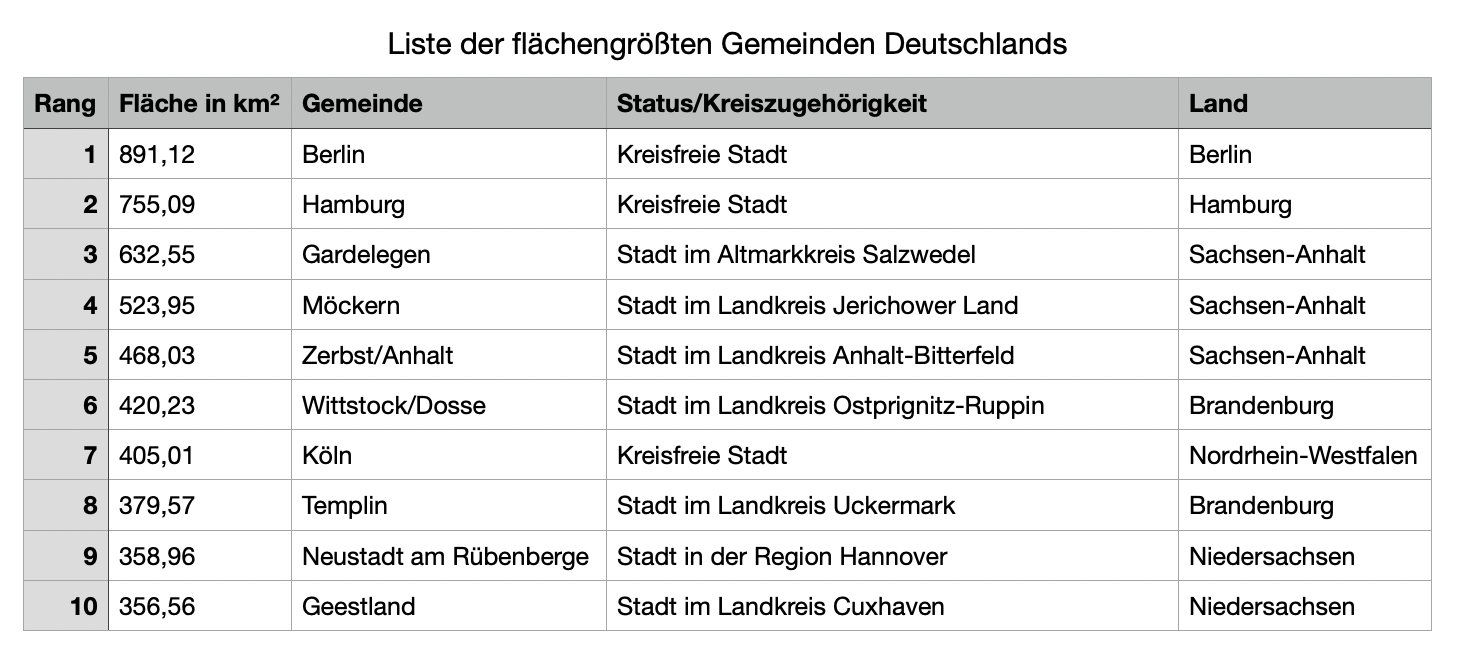

Wir haben unter Zuhilfenahme des `csv`-Moduls unseren eigenen Code geschrieben, um auszurechnen, wieviele der 100 flächengrößten Gemeinden sich in jedem der sechzehn Bundesländer befinden. In diesem Notebook lernen wir die sehr viel leistungsstärkere Bibliothek *pandas* kennen, die uns diese Rechnung im Handumdrehen liefern kann. Pandas kann aber viel mehr, wie wir gleich sehen werden.

Zu Beginn müssen wir pandas natürlich importieren. Folgendes Statement importiert die Bibliothek und verleiht ihr den Namen `pd`. Diese Abkürzung ist eine Konvention.

In [ ]:
import pandas as pd

Um pandas kennenzulernen, wollen wir mit einem großen Datensatz arbeiten, nämlich dem [Songkorpus](https://songkorpus.de/index.html). Der Songkorpus beinhält Lieder von bekannten deutschen Künstler:innen, u.a. von Udo Lindenberg und Fettes Brot und umspannt die Jahre 1972-2021. Öffentlich herunterladbar sind unter anderem Worthäufigkeiten pro Jahr und zwar als Tabelle (auf der Webseite selbst finden sich weitere spannende Daten und Analysen). Jedes Wort, das in einem oder mehreren Songs in einem bestimmten Jahr vorkommt, steht in einer eigenen Zeile, zusammen mit dem entsprechenden Jahr und der Häufigkeit, mit der es in diesem Jahr bei allen Künstler:innen auftritt (s.u.). Insgesamt handelt es sich um über 380.000 Wörter. Solch eine tabellarische Datei, zumal derart groß, ist prädestiniert dazu, mit pandas verarbeitet zu werden.

## Input

In der folgenden Zelle öffnen wir die Datei, die sich bereits in "3_Dateien/Songkorpus" befindet, und lesen sie mit der pandas-Funktion `read_csv` ein, die neben der geöffneten Datei u.a. auch das Trennzeichen (`sep`, in diesem Fall der Tabulator "\t") als Argument nimmt:

In [ ]:
with open("../3_Dateien/Songkorpus/songkorpus_token.tsv") as f:
    #vor read_csv steht wie gewohnt der Modulname, damit Python weiß, wo sich die Funktion befindet
    songkorpus = pd.read_csv(f, sep="\t") 

Neben `read_csv` für Dateien mit Trennzeichen, bietet `pandas` u.a. auch Funktionen für XML (`read_xml`) oder JSON (`read_json`) an.

Die Lesemethode überführt unsere Daten in jedem Fall in ein sog. *DataFrame*: 

In [ ]:
print(type(songkorpus))

DataFrames sind ein eigener Datentyp von pandas, auf dem wir eine Vielzahl nützlicher Operationen ausführen können, etwa um einen Überblick über die Daten zu bekommen.

## Überblick bekommen

Hier bietet sich insbesondere die Methode `head` an, die standardmäßig die ersten fünf Zeilen (also den "Kopf") des DataFrames ausgibt: 

In [ ]:
songkorpus.head() #head nimmt optional eine Ganzzahl als Argument, die definiert, wieviele der ersten Zeilen ausgegeben werden sollen

Eher komische Wörter in der Spalte "CO_TOKEN". Wie wir an Spalte "CO_YEAR" erkennen können, kamen sie aber auch nur jeweils einmal (im angegeben Jahr in "CO_YEAR") vor.

Das Gegenstück zu `head` ist `tail` (also der "Schwanz"), wodurch wir die letzten fünf Zeilen des DataFrames erhalten:

In [ ]:
songkorpus.tail()

Die Ausgabe sieht übrigens anders aus, wenn wir einen `print`-Befehl verwenden, anstatt dass JupyterLab schlicht die letzte Zeile ausgibt (probier's aus!). Mit `print`-Befehl verschwindet die angenehme Formatierung.

Mithilfe von `shape`, `columns` und `index` können wir außerdem in Erfahrung bringen, welches Format (`shape`), d.h. wieviele Spalten und Zeilen, das DataFrame hat sowie wie Spalten (`columns`) und Zeilen (`index`) benannt sind.

⚠️ Achtung: Es handelt sich dabei um sog. Attribute des DataFrames, die wir uns vereinfacht gesagt als Eigenschaften des DataFrames vorstellen können. Um auf ein Attribut eines Objekts zuzugreifen, hängt man den Namen des Attributs wie bei Methoden nach einem Punkt an das betreffende Objekt, schließt aber nicht mit Klammern ab:

In [ ]:
print(songkorpus.shape, songkorpus.columns, songkorpus.index)
original_len = len(songkorpus)

Unser DataFrame besteht also aus 386.510 Zeilen und drei Spalten. Die Anzahl an Zeilen, also die Länge des DataFrames, speichern wir in einer separaten Variablen ab, wir werden sie später noch brauchen.

Die Spaltennamen sind "CO_TOKEN", "CO_YEAR" und "CO_COUNT" und die Zeilen sind mit Indizes von 0 (inklusive) bis 386510 (exklusive) durchnumeriert. 

Die etwas kryptischen Spaltennamen können wir ändern, indem wir das Attribut `columns` unseres DataFrames ganz einfach mit einer Liste an neuen Spaltennamen überschreiben:

In [ ]:
songkorpus.columns = ["Wort", "Jahr", "Häufigkeit"]
print(songkorpus.columns)

Die Länge der Liste muss natürlich der Anzahl an Spalten entsprechen. 

Um eine spezifische Spalte zu überschreiben, können wir die `rename`-Methode verwenden, derer wir ein dictionary mit Schlüssel-Werte-Paaren (jetziger Name-neuer Name) übergeben. 

Zusätzlich müssen wir wie bei vielen anderen DataFrame-Operationen `inplace=True` spezifizieren. Der Grund dafür ist, dass `rename` standardmäßig eine Kopie des DataFrames erstellt, die wir entweder einer neuen Variable zuweisen oder mit der wir `songkorpus` überschreiben könnten. Letzteres erreichen wir aber einfacher, in dem wir definieren, dass die Manipulation im aktuellen DataFrame ("inplace") stattfinden soll: 

In [ ]:
songkorpus.rename(columns={"Wort": "Token"}, inplace=True)
songkorpus.head()

Schon kennen wir erste nützliche Operationen für einen ersten Eindruck der zu analysierenden Daten.

***

## 🔧 Anwendungsfall: Wortverlaufskurven visualisieren 📈

Auch in diesem Notebook gibt es einen Anwendungsfall: Wir wollen visualisieren, wie häufig beliebige Wörter in jedem Jahr im vom Songkorpus abgedeckten Zeitraum 1972-2021 vorkommen. Für die Begriffe "ich", "du", "er" und "sie" sähe das z.B. so aus:

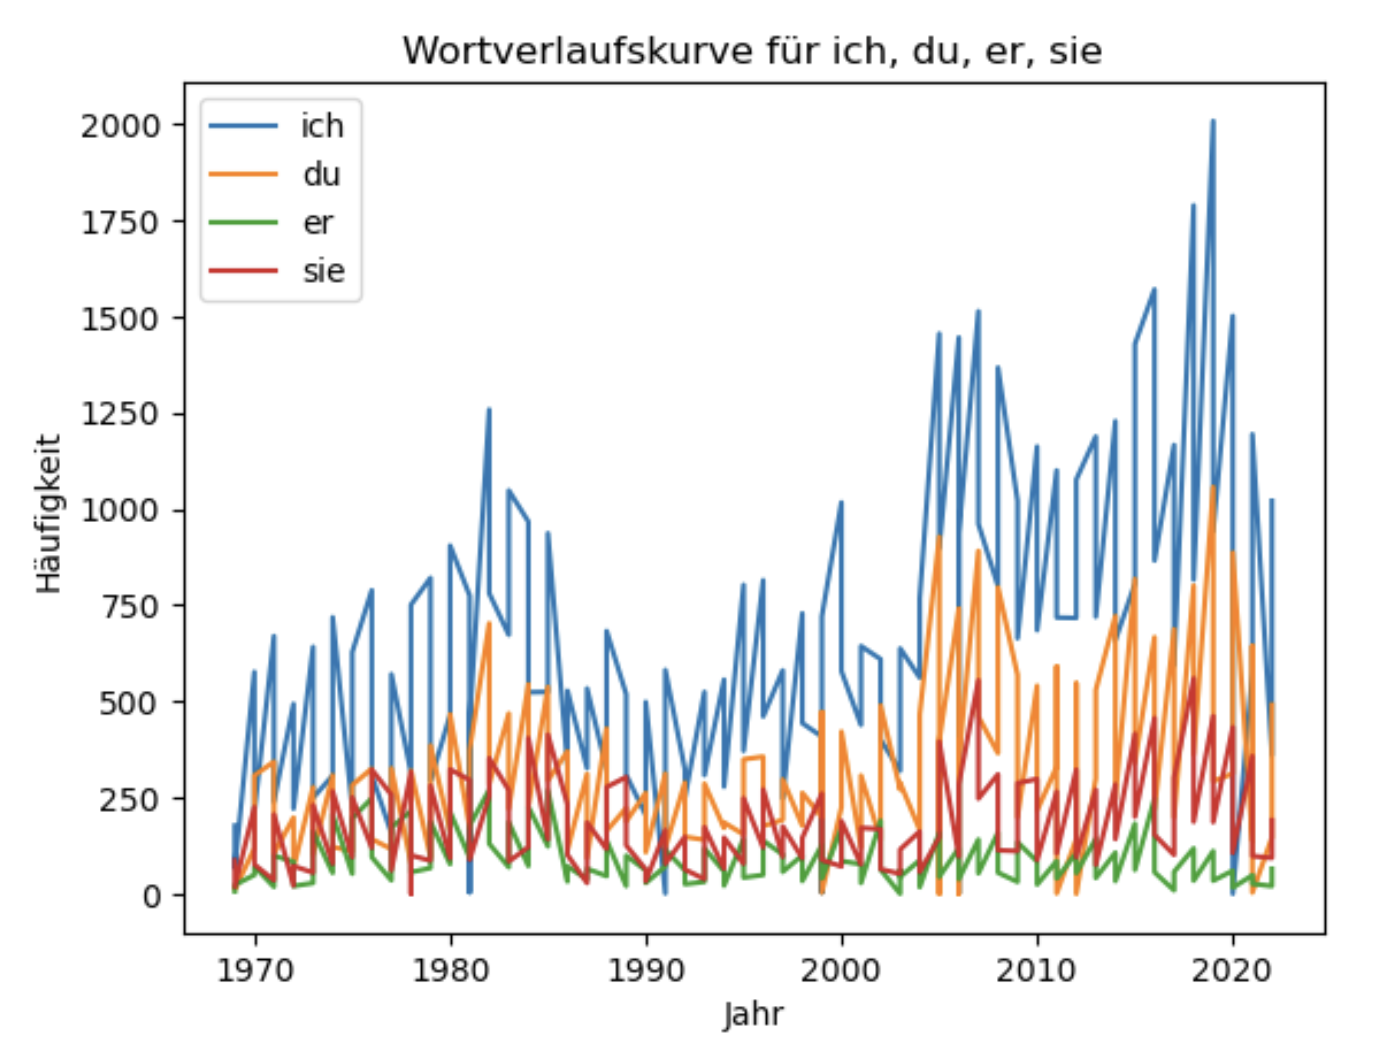

Es scheint, als sängen die Künstler:innen im Songkorpus bevorzugt über sich selbst. 😅

***

Zuallererst wollen wir einen detailierten Blick auf Spalten und Zeilen werfen, aus denen ein DataFrame ja besteht.

## Auf Spalten zugreifen

Wenn wir an einer bestimmten Spalte eines DataFrames interessiert sind, können wir auf diese mit der gleichen Syntax wie bei dictionaries zugreifen:

In [ ]:
songkorpus["Token"]

An dieser Stelle ist es natürlich wichtig, dass die Spalte aktuell wirklich "Token" und nicht mehr "CO_TOKEN" oder "Wort" heißt. Dies würde, wie bei inexistenten Schlüsseln in einem dictionary auch, zu einem `KeyError` führen.

Weiter funktioniert für den Spaltenzugriff auch die sog. dot-Notation nach dem Schema `DataFrame.column`:

In [ ]:
songkorpus.Token #beachte, dass hierfür der Spaltenname nicht als string, also ohne Anführungszeichen angehängt wird!

Die dot-Notation erfüllt (fast immer) die gleiche Funktion wie die Zugriffsweise über eckige Klammern, auf die wir uns fortan beschränken. 

In jedem Fall entspricht das, was wir dabei zurückerhalten, dem zweiten wichtigen Datentyp von pandas neben *DataFrame*, nämlich einer sog. *Series*:

In [ ]:
tokens = songkorpus["Token"]
print(type(tokens))

Series kann man mit Listen vergleichen. Sie sind im Gegensatz zu Dataframes nicht zweidimensional (Spalten und Zeilen), sondern eindimensional. Viele Listen-Operationen wie z.B. Indexing und Slicing funktionieren bei Series gleichermaßen:

In [ ]:
print(tokens[10002], "\n") #Indexing
print(tokens[9999:10003]) #slicing

***

✏️ **Übung 1:** Lass Dir das 100.000te, 200.000te und 300.000te Token in der Series `tokens` ausgeben. Verwende dazu maximal eine Zeile.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Anstatt *eines* Spaltennamens können wir auch eine Liste an Spaltennamen übergeben, um auf mehrere Spalten gleichzeitig zuzugreifen:

In [ ]:
two_columns = songkorpus[["Token", "Jahr"]].head() #beachte die inneren eckigen Klammern für die Liste!
two_columns

Überlege Dir kurz, was für ein Datentyp `two_columns` hat. 

Genau: Nun haben wir nicht mehr nur eine Spalte, in der Zeilenwert um Zeilenwert in einer Dimension gespeichert ist, sondern zwei Spalten. `two_columns` ist also immer noch ein zweidimensionales Objekt, sprich ein DataFrame:

In [ ]:
print(type(two_columns))

Nun wissen wir, wie wir auf Spalten zugreifen können. 

## Auf Zeilen zugreifen

Um auf Zeilen zuzugreifen, hängen wir `.loc[index]` an das DataFrame an und übergeben den Index der gewünschten Zeile anstelle von `index`:

In [ ]:
songkorpus.loc[777]

Verwende stets diese Syntax, um auf Zeilen zuzugreifen. Anfänger:innen versuchen oft, die Syntax `DataFrame[index]` zu verwenden. Das führt aber zu einem `KeyError`, denn diese Syntax ist dem Spaltenzugriff vorbehalten. Bei DataFrames haben ganz einfach die Spalten den Status von Schlüsseln (theoretisch könnte es auch andersrum sein, ist es aber nicht!). 

Da wir bloß auf eine einzige Zeile zugreifen, in der Spaltenwert um Spaltenwert in einer Dimensiion gespeichert ist, liegt der Datentyp Series vor:

In [ ]:
print(type(songkorpus.loc[777]))

Zur Verdeutlichung: Sowohl eine Sequenz von Werten einer Spalte als auch eine Sequenz von Werten einer Zeile entsprechen bei pandas einer Series. Entscheidend ist bloß, dass nur eine einzige Dimension vorliegt. Sobald ein Objekt sowohl mehrere Spalten als auch mehrere Zeilen umfasst, handelt es sich um ein DataFrame.

Ein solches Objekt können wir auch über `loc` erhalten, indem wir auf mehrere Zeilen gleichzeitig zugreifen. Dies funktioniert wie bei dem Zugriff auf mehrere Spalten (s.o), indem wir mehrere Indizes als Liste übergeben.

In [ ]:
print(type(songkorpus.loc[[777,888]]))
songkorpus.loc[[777,888]] #beachte die inneren eckigen Klammern für die Liste!

Zudem können wir auf mehrere aufeinanderfolgende Zeilen zugreifen, indem wir dieselbe Syntax wie bei Slicing verwenden:

In [ ]:
songkorpus.loc[777:780]

Abschließend sei erwähnt, dass Zeilen nicht zwingend mit *numerischen* Indizes benannt sein müssen. Zeilen können wie Spalten ebenfalls Namen haben. Dieses Szenario wollen wir in der nächsten Übung mit denselben Daten durchspielen.

***

✏️ **Übung 2:** 

1. Lies die Datei `songkorpus_tokens.tsv` abermals ein und übergib beim Erstellen des DataFrames zusätzlich den Parameter `index_col=0`. Dadurch wird die erste Spalte (mit dem Index 0), also diejenige mit den Tokens, zur sog. *Index-Spalte*. Jede Zeile hat nun statt einem numerischen Index einen Namen, nämlich das jeweilige Token. Weise das DataFrame der Variablen `songkorpus_labelled_rows` zu. 
2. Benenne die Spalten wie bei `songkorpus` um. Falls Du hier eine Fehlermeldung kriegst, lies sie aufmerksam und passe Deinen Code entsprechend an.
3. Überlege Dir, was die Tatsache, dass wir nun Tokens als Zeilennamen verwenden, zur Konsequenz hat. Experimentiere dazu gerne mit dem DataFrame herum und greife auf verschiedene Zeilen über Namen zu. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Im Gegensatz zu Spaltennamen (und Schlüsseln bei dictionaries) dürfen Zeilennamen mehrfach vorkommen. Der Zugriff auf eine oder mehrere Zeilen funktioniert ungeachtet dessen gleich wie bei DataFrames mit numerischen Indizes, also mittels `.loc[index]`.

***

✏️ **Übung 3:** Setze die Tatsache, dass Zeilennamen mehrfach vorkommen dürfen, produktiv ein und finde heraus, wie oft "Dresden" in `songkorpus_labelled_rows` vorkommt, indem Du die Häufigkeiten in allen Jahren, in denen das Wort gesungen wird, zusammenzählst.

💡 Tipp: Der erste Schritt besteht darin, aus dem gesamten DataFrame `songkorpus_labelled_rows` ein kleineres sog. *Sub-DataFrame* zu erstellen, das mit einer neuen Variablen referenziert wird. Der zweite Schritt besteht darin, eine Series aus diesem Sub-DataFrame "herauszuschneiden", die Du anschließend wie eine Liste behandeln kannst, um schließlich zur Anzahl der Nennungen von "Dresden" zu gelangen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

## Auf Spalten und Zeilen zugreifen

Natürlich können wir auch gleichzeitig angeben, auf welche Spalte(n) und Zeile(n) wir bei einem DataFrame zugreifen möchten. 

Das geht wahlweise, indem wir syntaktisch erst festlegen, welche Spalte(n) wir gerne hätten und dann welche Zeilen, oder umgekehrt: 

In [ ]:
print(songkorpus["Jahr"][10], "\n")
print(songkorpus.loc[10]["Jahr"])

Wie immer können wir auch Listen übergeben, um auf mehrere Spalten und/oder mehrere Zeilen zuzugreifen. Beim Zeilenzugriff funktioniert auch die slicingähnliche Syntax für eine Sequenz an Zeilen:

In [ ]:
songkorpus[["Token", "Häufigkeit"]][9999:10005]

Nun wissen wir, wie wir auf beliebige (Kombinationen) von Spalte(n) und Zeile(n) zugreifen können. Als Nächstes möchten wir unseren Daten erweitern, indem wir eine zusätzliche Spalte hinzufügen:

## Spalten hinzufügen

Eine einzelne Spalte entspricht ja einer Series und Series wiederum kommen Listen sehr nahe. Deshalb können wir zur Definition einer neuen Spalte ganz einfach eine Liste übergeben, deren Länge natürlich der Anzahl an Zeilen des DataFrames entsprechen muss.

Sagen wir, wir hätten gerne eine neue Spalte, in der die Dekade gespeichert wird, in der das jeweilige Token gesungen wurde. Die einzelnen Jahre haben wir schon, nun wollen wir aber jeweils zehn Jahre zu einer Dekade bündeln. Dazu iterieren wir am einfachsten über die Spalte "Jahr" in `songkorpus` (auch hier zieht die Analogie Series – Liste!), greifen auf den jeweiligen Wert in der Spalte "Jahr" zu, casten ihn in einen string und hängen das Jahr reduziert auf die Dekade einer neuen Liste an:

In [ ]:
decades = []
for year in songkorpus["Jahr"]:
    """Casten in einen string ist erforderlich, da sich Slicing nur auf sequentielle Objekte anwenden lässt 
    (Ganzzahlen gehören nicht dazu, vgl. zweites Notebook) und nur strings miteinander konkateniert werden können."""
    decade = str(year)[:-1] + "0"
    decades.append(decade)

Anschließend müssen wir nur noch eine neue Spalte in `songkorpus` definieren und ihr die Liste `decades` zuweisen. Das Erstellen einer neuen Spalte erfolgt genau gleich wie das Definieren eines neuen Schlüssels bei einem dictionary:

In [ ]:
songkorpus["Dekade"] = decades
songkorpus.head()

***

✏️ **Übung 4:**

Füge `songkorpus` eine weitere Spalte mit dem Namen "Länge" hinzu, in der die Anzahl Buchstaben je Token steht.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

✏️ **Übung 5:** Vereinfache den Code von oben, mit dessen Hilfe wir die Spalte "Dekade" hinzugefügt haben, indem Du ihn mittels List Comprehension (vgl. viertes Notebook) auf eine einzige Zeile reduzierst. Hole den Abschnitt zu List Comprehensions nach, falls Du ihn damals ausgelassen hast, da er als fortgeschritten markiert war.

Hinweis: `songkorpus` verfügt ja bereits über eine Spalte mit dem Namen "Dekade". Indem Du das Resultat Deiner List Comprehension `songkorpus["Dekade"]` zuweist, überschreibst du die befindliche Spalte ganz einfach.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Schauen wir uns nun an, wie wir Zeilen zu einem DataFrame hinzufügen können.

## Zeilen hinzufügen

Auch neue Zeilen können wir als Liste einem DataFrame hinzufügen. Die Länge der Liste muss wiederum der Anzahl an Spalten entsprechen. 

Dies ist bei `new_row` in der nächsten Zelle nur der Fall, wenn Du in der Übung oben eine fünfte Spalte namens "Länge" hinzugefügt hast. Um sicherzustellen, dass `songkorpus` im Weiteren alle notwendigen Spalten umfasst, fügt die erste Zeile die Spalte "Länge" mittels List Comprension hinzu (bzw. überschreibt eine bereits vorhandene).

In [ ]:
songkorpus["Länge"] = [len(str(token)) for token in songkorpus["Token"]]
new_row = ["Fantasiewort", 2023, 800, 2020, 12]

`new_row` können wir `songkorpus` nun unter Verwendung der bereits bekannten `.loc[index]`-Syntax hinzufügen. Als `index` geben wir schlicht den letzten numerischen Index + 1 an, was der Länge von `songkorpus` entspricht (die numerischen Indizes fangen nämlich bei 0 an):

In [ ]:
songkorpus.loc[len(songkorpus)] = new_row
songkorpus.tail()

Wenn Du diese Zelle mehrfach ausführst, wird `new_row` jedes einzelne Mal hinzugefügt. Schließlich entspricht `len(songkorpus)` jedes Mal dem letzten numerischen Index + 1. 

Anstatt eine Zeile am Ende eines DataFrames hinzuzufügen, kannst Du die gleiche Syntax verwenden, um eine bestimmte, bereits existierende Zeile zu überschreiben. Das tun wir hier aber nicht, da wir mit den originalen Daten weiterarbeiten möchten. Entsprechend wollen wir die letzte(n) Zeile(n) mit Fantasiewörtern auch wieder entfernen.

## Spalten und Zeilen entfernen

Zu diesem Zweck gibt es die `drop`-Methode, die wir sowohl zum Entfernen von Spalten als auch Zeilen benutzen können. Als erstes Argument übergeben wir ihr den Namen der zu entfernenden Spalte bzw. den numerischen Index (oder Namen, s.o.) der zu entfernenden Zeile. Um mehrere Spalten oder Zeilen zu entfernen, können jeweils auch Listen übergeben werden. Anschließend spezifizieren wir mithilfe des `axis`-Parameters, ob es sich um eine Spalte oder eine Zeile handelt, die entfernt werden soll. `axis=1` steht für Spalten und `axis=0` für Zeilen (was der Standardwert ist und nicht zwingend angegeben werden muss). Letzlich müssen wir `inplace=True` spezifizieren, wenn die Änderung direkt am DataFrame durchgeführt werden soll. Die Syntax mit Standardwerten lautet also folgendermaßen:

`DataFrame.drop(index_or_name, axis=0, inplace=False)`

***

✏️ **Übung 6:** Führe die Zelle oben, in der wir `songkorpus` Zeilen mit Fantasiewörtern hinzugefügt haben, noch ein paar Mal aus, ohne darauf zu achten wie oft. Verwende nun `drop` in einer geeigneten Kontrollstruktur (vgl. drittes Notebook) sowie die anfangs eingeführte Variable `original_len`, um die Fantasiewörter wieder zu entfernen und `songkorpus`, was die Anzahl an Zeilen betrifft, wieder in seinen Originalzustand zu bringen. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Einige der Spalten in `songkorpus` enthalten ja numerische Werte, konkret die Spalten "Jahr", "Häufigkeit" und "Länge" (die Werte in "Dekade" haben wir als string abgespeichert, s.o.). 

## Deskriptive Statistiken

Numerischen Werten nähern wir uns am besten über despriptive Statistiken an, also etwa über Minimal- und Maximalwerte.

Pandas bietet dafür eine Reihe nützlicher Methoden: Angewandt auf eine Spalte, gibt `min` den kleinsten Wert darin zurück, `max` den größten, `mean` den Durchschnitt und `median` den Median:

In [ ]:
print(songkorpus["Häufigkeit"].min())
print(songkorpus["Häufigkeit"].max())
print(songkorpus["Häufigkeit"].mean())
print(songkorpus["Häufigkeit"].median())

Wenig überraschend ist 1 der kleinste Wert in der Spalte "Häufigkeit". Wörter, die gar nie vorkommen, befinden sich ja nicht im Datensatz. 

Spannend ist jedoch, zu erfahren, dass das meistgesungene Token 2007 Mal in einen bestimmten Jahr vorkommt. Interessant ist auch, dass der Durchschnitt zwar bei fast 6 Nennungen liegt, mindestens die Hälfte aller Werte jedoch genau 1 sind. Der Median ist ja der Wert, der genau in der Mitte aller "aufgereihten" Werte steht: links von ihm können also nur weitere Einsen stehen, in der Mitte steht selbst auch eine 1. Diese Logik funktioniert natürlich nur, weil wir wissen, dass alle Werte in dieser Spalte Ganzzahlen sind.

Einen kompakten Überblick über diese und ein paar weitere Statistiken liefert auch `describe`:

In [ ]:
songkorpus["Häufigkeit"].describe()

Dabei lernen wir u.a., dass drei Viertel aller Tokens nur maximal drei Mal in einem bestimmten Jahr vorkommen.

`describe` lässt sich nicht nur auf eine Series, sondern auch auf ein DataFrame anwenden, wobei wir die Statistiken nur bei Spalten mit numerischen Werten erhalten:

In [ ]:
songkorpus.describe()

Sehr nützlich ist auch die `value_counts`-Methode, die sämtliche Werte in einer Spalte auszählt und uns eine Art Frequenzwörterbuch zurückgibt. Die Methode liefert also genau das, was wir im fünften Notebook manuell für die 100 flächengrößten Gemeinden Deutschlands errechnet haben:

In [ ]:
songkorpus["Dekade"].value_counts()

Die Zehnerjahre sind also am häufigsten vertreten `songkorpus`. 

Da absolute Zahlen oft schwer miteinander zu vergleichen sind, bietet `value_counts` auch die Möglichkeit, die Werte zu normalisieren, d.h. relativ auszugeben. Dazu spezifizieren wir ganz einfach `normalize=True`:

In [ ]:
songkorpus["Dekade"].value_counts(normalize=True)

So lässt sich leicht ablesen, dass fast die Hälfte aller Tokens in `songkorpus` aus den Nuller- und Zehnerjahren stammen. Dieses Ungleichgewicht müssen wir bei künftigen Analysen im Hinterkopf behalten.

***

✏️ **Übung 7:** Mithilfe von `describe` haben wir oben herausgefunden, dass die durchschnittliche Wortlänge in `songkorpus` 6.88 Buchstaben beträgt. Die maximale Wortlänge beträgt hingegen sagenhafte 53 Buchstaben. Die Verteilung scheint alles andere als gleichmäßig zu sein, was wir auch an den sog. *Quartilen* 25% und 75% sehen (Quartile werden wie der Median berechnet, nur geht es nicht um den Mittelwert sondern um die Werte nach einem Viertel bzw. drei Vierteln aller aufgereihten Werte). Finde heraus, welche Wortlängen für jeweils mindestens 10 % aller Wörter gelten. Finde ebenfalls heraus, welche Wortlängen für jeweils maximal 1 % aller Wörter gelten.

💡 Tipp: Einer von verschiedenen denkbaren Lösungswegen involviert die Tatsache, dass DataFrames und Series mit dictionaries verwandt sind und sich auch in ein solches casten lassen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




*** 

Zwei weitere hilfreiche Methoden sind `nlargest` und `nsmallest`, die das DataFrame nach einer bestimmten Spalte (spezifiziert als zweites Argument) sortieren und die *n* (spezifiziert als erstes Argument) obersten bzw. untersten Zeilen ausgibt. Folgender Code liefert also die obersten zehn Zeilen eines nach der Spalte "Häufigkeit" absteigend sortierten DataFrames:

In [ ]:
songkorpus.nlargest(10, "Häufigkeit")

Wasser auf die Mühlen der Selbstbezogenheitsthese (s.o.)! 😅

Natürlich können wir ein DataFrame auch als Ganzes sortieren, anstatt bloß die *n* obersten bzw. untersten Zeilen zurückzukriegen.

## Werte sortieren

Dazu benutzen wir die Methode `sort_values`, der wir als erstes Argument die Spalte übergeben, anhand derer wir sortieren wollen, und als zweites Argument die Richtung der Sortierung, wobei `ascending=True` für aufsteigend und `ascending=False` für absteigend steht. Schließlich können wir `inplace=True` spezifizieren, wenn wir die Änderung direkt am DataFrame vornehmen wollen. 

Folgender Code sortiert `songkorpus` aufsteigend nach der Spalte "Jahr":

In [ ]:
songkorpus.sort_values("Jahr", ascending=True, inplace=True)
songkorpus.head()

Wenn wir weder an der Häufigkeitsverteilung aller Werte in einer bestimmten Spalte (`value_counts`), noch an deren Reihenfolge (`nlargest`, `nsmallest` und `sort_values`) interessiert sind, sondern an der bloßen Existenz eines Wertes (egal wie oft er auftritt), gibt es eine weitere praktische Methode.

## Einzigartige Werte

Nämlich `unique`, das ähnlich wie die Funktion `set` (vgl. zweites Notebook) alle einzigartigen Werte in einer bestimmten Spalte zurückgibt:

In [ ]:
songkorpus["Jahr"].unique()

***

✏️ **Übung 8:** Wir wissen bereits, wieviele Tokens in unserem DataFrame vorkommen, nämlich 386.510. Finde heraus, wieviele einzigartige Token, also Types (vgl. viertes Notebook) es gibt.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

## Werte zählen

Strategie oben bei "Dresden" erwähnen

In [ ]:
len(songkorpus[songkorpus["Token"].str.lower() == "hass"]) #teuflisch

## Werte manipulieren

In [ ]:
songkorpus["Token"] = songkorpus["Token"].str.lower()
df.loc[i, "turn_id"] = turn_id #why loc?

## DataFrame filtern

In [ ]:
krieg = songkorpus[songkorpus["Token"] == "krieg"]
liebe = songkorpus[songkorpus["Token"].str.contains("liebe", na=False)]

#neues DF mit Tokens ohne Sonderzeichen

In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

songkorpus_part = songkorpus[songkorpus["Jahr"] > 2016]
types = songkorpus_part["Token"].unique()
frequency = [songkorpus_part[songkorpus_part["Token"] == type_]["Häufigkeit"].sum() for type_ in pbar(types)]

In [ ]:
songkorpus_types = pd.concat([pd.Series(types), pd.Series(frequency)], axis=1)
songkorpus_types.columns = ["Type", "Häufigkeit"]
songkorpus_types.nlargest(10, "Häufigkeit")
songkorpus_types["Länge"] = songkorpus_types["Type"].apply(str).apply(len)
songkorpus_types

## 🔧 Anwendungsfall: Wortverlaufskurven visualisieren 📈

In [ ]:
def plot_words():
    
    import matplotlib.pyplot as plt
    
    words = []
    
    while True:
        word = input("Welches Wort soll geplottet werden?\nFalls kein weiteres: nur Enter drücken.\n")
        
        if len(word) > 0:
            words.append(word.lower())
        
        else:
            if len(words) < 2:
                print("Du musst mindestens zwei Wörter auswählen.")
                continue
            else:
                break
    
    #Manipulieren
    songkorpus["Token"] = songkorpus["Token"].str.lower()
        
    for word in words:
        #Filtern
        word_df = songkorpus[songkorpus["Token"] == word]
        #Sortieren
        word_df_sorted = word_df.sort_values(by="Jahr", ascending=True)
        #Zugriff
        x = word_df_sorted["Jahr"]
        y = word_df_sorted["Häufigkeit"]
        #Plotten
        plt.plot(x, y)
    
    plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
    plt.xlabel("Jahr")
    plt.ylabel("Häufigkeit")
    plt.legend(words, loc="best") 

In [ ]:
plot_words()

## Output

In [ ]:
#Schreiben
df.to_csv(path, sep",", encoding="utf-8")